In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# DATA FORMATTED is not in true CSV format
gender_data_path = './data/audience/IG_Audience_By_Gender.csv'
gender_age_df = pd.read_csv(gender_data_path)

city_data_path = './data/audience/IG_Audience_By_City.csv'
top_cities_df = pd.read_csv(city_data_path)

print(gender_age_df.head())
print(top_cities_df.head())


     Age  Women    Men
0  18-24  46.9%  17.2%
1  25-34  18.2%   8.7%
2  35-44   1.6%   1.9%
3  45-54   2.5%   0.6%
4  55-64   1.2%   0.6%
        Top cities  Value
0   Sweetwater, FL  15.7%
1     New York, NY    10%
2        Miami, FL   9.8%
3  North Miami, FL   6.6%
4      Tamiami, FL   3.4%


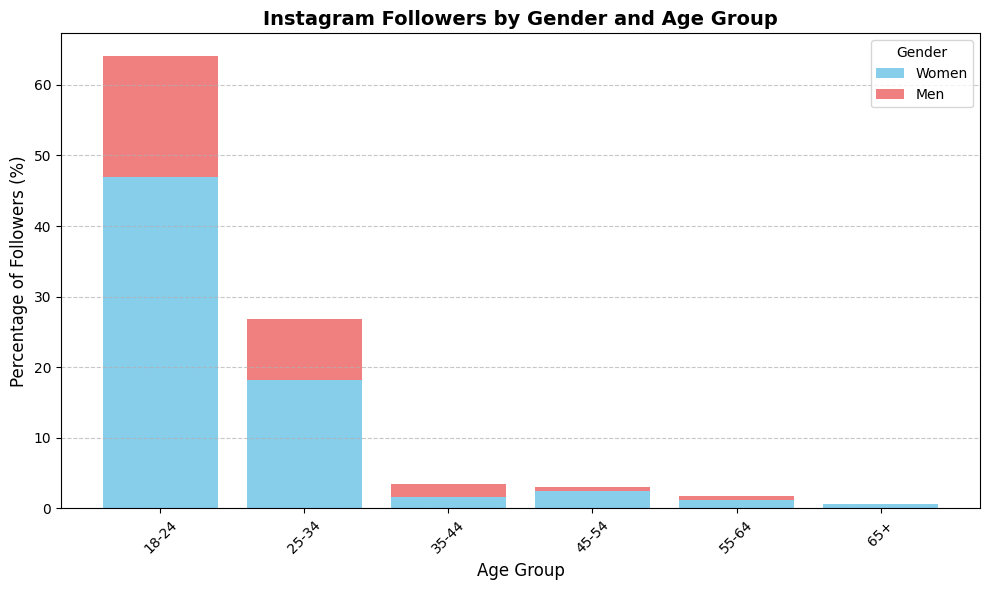

In [36]:
# Ensure that all values in 'Women' and 'Men' columns are strings before stripping the '%'
gender_age_df[['Women', 'Men']] = gender_age_df[['Women', 'Men']].astype(str).apply(lambda x: x.str.rstrip('%').astype(float))

# Now you can proceed with plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(gender_age_df['Age'], gender_age_df['Women'], label='Women', color='skyblue')
plt.bar(gender_age_df['Age'], gender_age_df['Men'], bottom=gender_age_df['Women'], label='Men', color='lightcoral')

# Add labels and title
plt.title('Instagram Followers by Gender and Age Group', fontsize=14, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Followers (%)', fontsize=12)

# Add grid, legend, and formatting
plt.legend(title='Gender')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


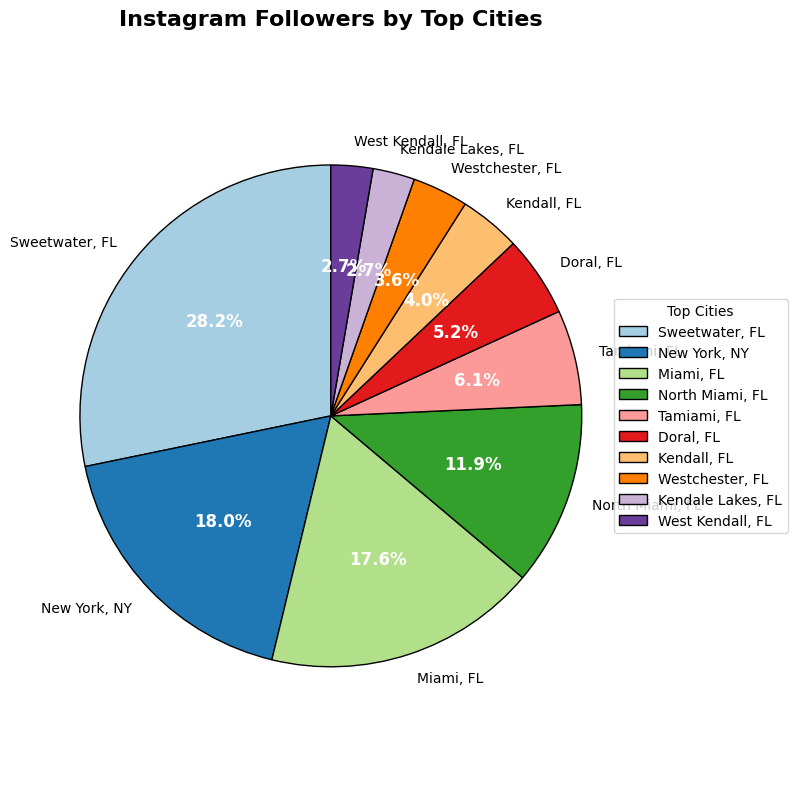

In [39]:
# Convert percentages from strings to floats for Top Cities
top_cities_df['Value'] = top_cities_df['Value'].astype(float)

# Colors for the pie chart (you can customize as needed)
colors = plt.cm.Paired.colors

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_cities_df['Value'], 
    labels=top_cities_df['Top cities'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Adds black border for clearer sections
    textprops={'fontsize': 10}  # Makes the text inside the chart more readable
)

# Customize the appearance of the percentages inside the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Add a legend
plt.legend(wedges, top_cities_df['Top cities'], title="Top Cities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title with better styling
plt.title('Instagram Followers by Top Cities', fontsize=16, weight='bold', pad=20)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Improve layout to prevent overlaps
plt.tight_layout()

# Show the plot
plt.show()